In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import requests
import time
from datetime import datetime

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [85]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + ""
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 41.97,
  'feels_like': 35.33,
  'temp_min': 39.38,
  'temp_max': 43.68,
  'pressure': 1008,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 11.99, 'deg': 0, 'gust': 14},
 'clouds': {'all': 100},
 'dt': 1649035614,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648981388,
  'sunset': 1649027491},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | villa bruzual
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | edson
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | escanaba
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | fomboni
Processing Record 23 of Set 1 | zachagans

Processing Record 37 of Set 4 | zyryanka
Processing Record 38 of Set 4 | omsukchan
Processing Record 39 of Set 4 | gamba
Processing Record 40 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 4 | tuktoyaktuk
Processing Record 42 of Set 4 | san quintin
Processing Record 43 of Set 4 | bontang
Processing Record 44 of Set 4 | agadez
Processing Record 45 of Set 4 | acapulco
Processing Record 46 of Set 4 | tynda
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | preeceville
Processing Record 49 of Set 4 | ayorou
Processing Record 50 of Set 4 | san cristobal
Processing Record 1 of Set 5 | ponta do sol
Processing Record 2 of Set 5 | wenling
Processing Record 3 of Set 5 | sedelnikovo
City not found. Skipping...
Processing Record 4 of Set 5 | atuona
Processing Record 5 of Set 5 | keshan
City not found. Skipping...
Processing Record 6 of Set 5 | clyde river
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | woudrichem
Proc

Processing Record 27 of Set 8 | flinders
Processing Record 28 of Set 8 | edd
Processing Record 29 of Set 8 | talnakh
Processing Record 30 of Set 8 | volksrust
Processing Record 31 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 32 of Set 8 | havre
Processing Record 33 of Set 8 | balikpapan
Processing Record 34 of Set 8 | xuddur
Processing Record 35 of Set 8 | vardo
Processing Record 36 of Set 8 | sinegorskiy
Processing Record 37 of Set 8 | shiroishi
Processing Record 38 of Set 8 | panna
Processing Record 39 of Set 8 | guekedou
City not found. Skipping...
Processing Record 40 of Set 8 | bababe
City not found. Skipping...
Processing Record 41 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 43 of Set 8 | alamogordo
Processing Record 44 of Set 8 | limbang
Processing Record 45 of Set 8 | knysna
Processing Record 46 of Set 8 | thiruvananthapuram
Processing Record 47 of Set 8 | sinte

Processing Record 11 of Set 12 | jibuti
Processing Record 12 of Set 12 | puerto escondido
Processing Record 13 of Set 12 | santa rosa
Processing Record 14 of Set 12 | jiangkou
Processing Record 15 of Set 12 | nuevo progreso
Processing Record 16 of Set 12 | sorong
Processing Record 17 of Set 12 | kulhudhuffushi
Processing Record 18 of Set 12 | qandala
Processing Record 19 of Set 12 | augusto correa
Processing Record 20 of Set 12 | sergeyevka
Processing Record 21 of Set 12 | hamburg
Processing Record 22 of Set 12 | romanovo
Processing Record 23 of Set 12 | poya
Processing Record 24 of Set 12 | nemuro
Processing Record 25 of Set 12 | kinshasa
Processing Record 26 of Set 12 | seymchan
Processing Record 27 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 28 of Set 12 | cham
Processing Record 29 of Set 12 | dicabisagan
Processing Record 30 of Set 12 | corn island
Processing Record 31 of Set 12 | najran
Processing Record 32 of Set 12 | manaure
Processing Record 33 of Se

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,63.57,56,3,4.83,NZ,2022-04-04 01:30:05
1,Arraial Do Cabo,-22.9661,-42.0278,76.57,87,3,4.38,BR,2022-04-04 01:28:15
2,Airai,-8.9266,125.4092,73.18,51,9,2.48,TL,2022-04-04 01:30:06
3,Villa Bruzual,9.3328,-69.1208,82.09,54,51,2.59,VE,2022-04-04 01:30:07
4,Port Alfred,-33.5906,26.8910,66.18,89,50,7.96,ZA,2022-04-04 01:30:07
5,Ushuaia,-54.8000,-68.3000,37.06,87,20,11.50,AR,2022-04-04 01:25:08
6,Rikitea,-23.1203,-134.9692,77.43,65,100,9.60,PF,2022-04-04 01:28:57
7,New Norfolk,-42.7826,147.0587,67.71,61,63,1.50,AU,2022-04-04 01:30:09
8,Edson,53.5835,-116.4356,50.14,27,0,6.91,CA,2022-04-04 01:30:09
9,Avarua,-21.2078,-159.7750,73.45,88,75,3.44,CK,2022-04-04 01:30:10


In [21]:
#city_data_df=city_data_df["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2022-04-04 01:30:05,-46.2817,169.8464,63.57,56,3,4.83
1,Arraial Do Cabo,BR,2022-04-04 01:28:15,-22.9661,-42.0278,76.57,87,3,4.38
2,Airai,TL,2022-04-04 01:30:06,-8.9266,125.4092,73.18,51,9,2.48
3,Villa Bruzual,VE,2022-04-04 01:30:07,9.3328,-69.1208,82.09,54,51,2.59
4,Port Alfred,ZA,2022-04-04 01:30:07,-33.5906,26.8910,66.18,89,50,7.96


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

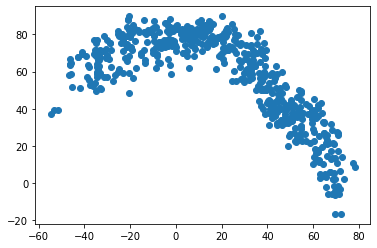

In [24]:
plt.scatter(lats,max_temps)

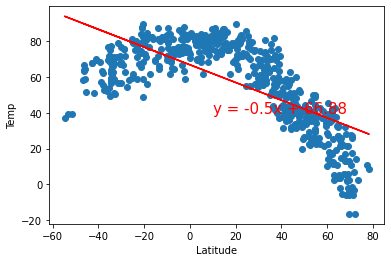

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
#plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [49]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
#If we run this code there will be no output until we call the function with five parameters.

#REWIND
#To get an output from a function, we need to call the function with the correct number of parameters or arguments for the function.

In [74]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Villa Bruzual,VE,2022-04-04 01:30:07,9.3328,-69.1208,82.09,54,51,2.59
8,Edson,CA,2022-04-04 01:30:09,53.5835,-116.4356,50.14,27,0,6.91
10,Butaritari,KI,2022-04-04 01:29:06,3.0707,172.7902,81.39,72,97,11.92
11,Pevek,RU,2022-04-04 01:30:11,69.7008,170.3133,-4.02,85,5,2.59
13,Leningradskiy,RU,2022-04-04 01:30:12,69.3833,178.4167,-6.16,90,100,4.23


In [61]:
index13=city_data_df.loc[3]
index13

City                Villa Bruzual
Country                        VE
Date          2022-04-04 01:30:07
Lat                        9.3328
Lng                      -69.1208
Max Temp                    82.09
Humidity                       54
Cloudiness                     51
Wind Speed                   2.59
Name: 3, dtype: object

LinregressResult(slope=-1.110238587864025, intercept=93.35885048453108, rvalue=-0.9122646476481401, pvalue=9.13067169667511e-150, stderr=0.025538435879211896, intercept_stderr=1.107547429393855)


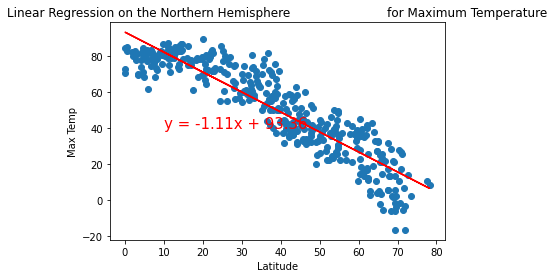

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(linregress(x_values, y_values))
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

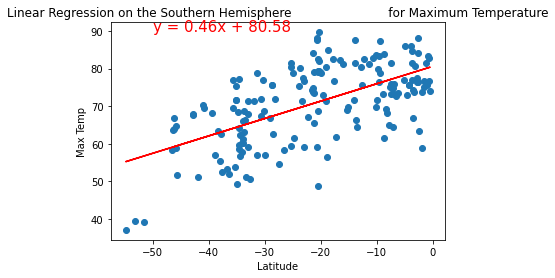

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

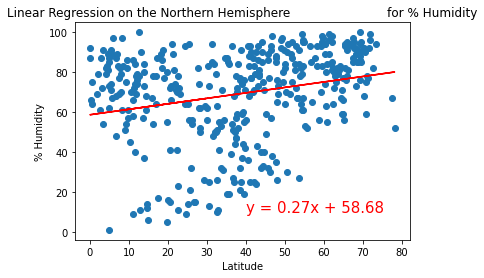

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

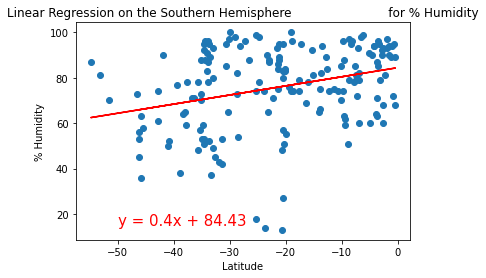

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

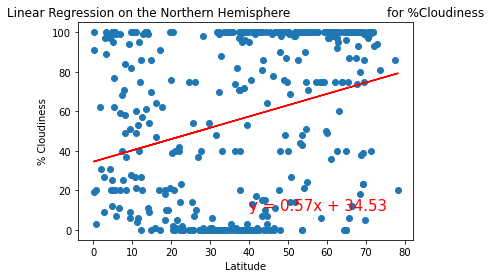

In [75]:
# Linear Regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Cloudiness', '% Cloudiness',(40,10))

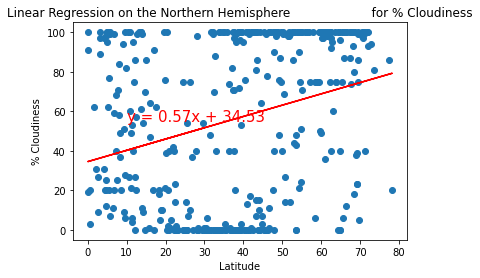

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

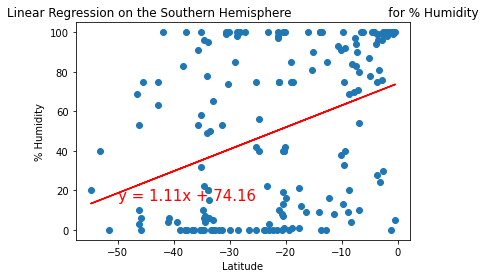

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

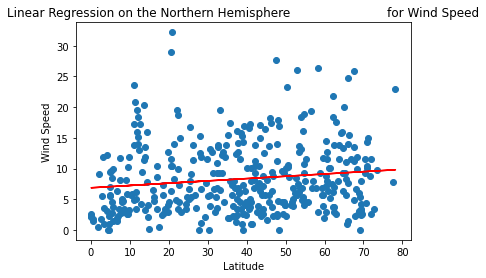

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

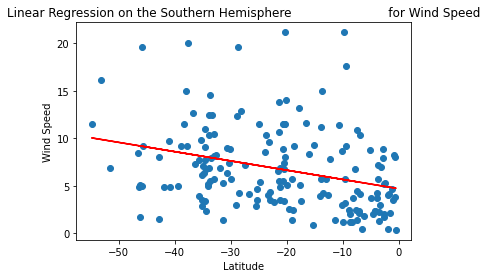

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))